In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
data = pd.read_csv(r'C:\Users\pc\OneDrive\Desktop\test_dco\heart_v2.csv')

In [8]:
data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [10]:
data.shape

(270, 5)

In [11]:
data['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [12]:
# Convert into X and y
y = data.pop('heart disease')
X = data

In [13]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [14]:
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


# Train test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state =42)
X_train.shape,X_test.shape

((189, 4), (81, 4))

## Building the Decision tree
Use all default Parameters except depth

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
# Instantiate
dtc = DecisionTreeClassifier(max_depth =3)

In [19]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [20]:
# Visualize the decision tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from sklearn.tree import plot_tree

## Graphviz method

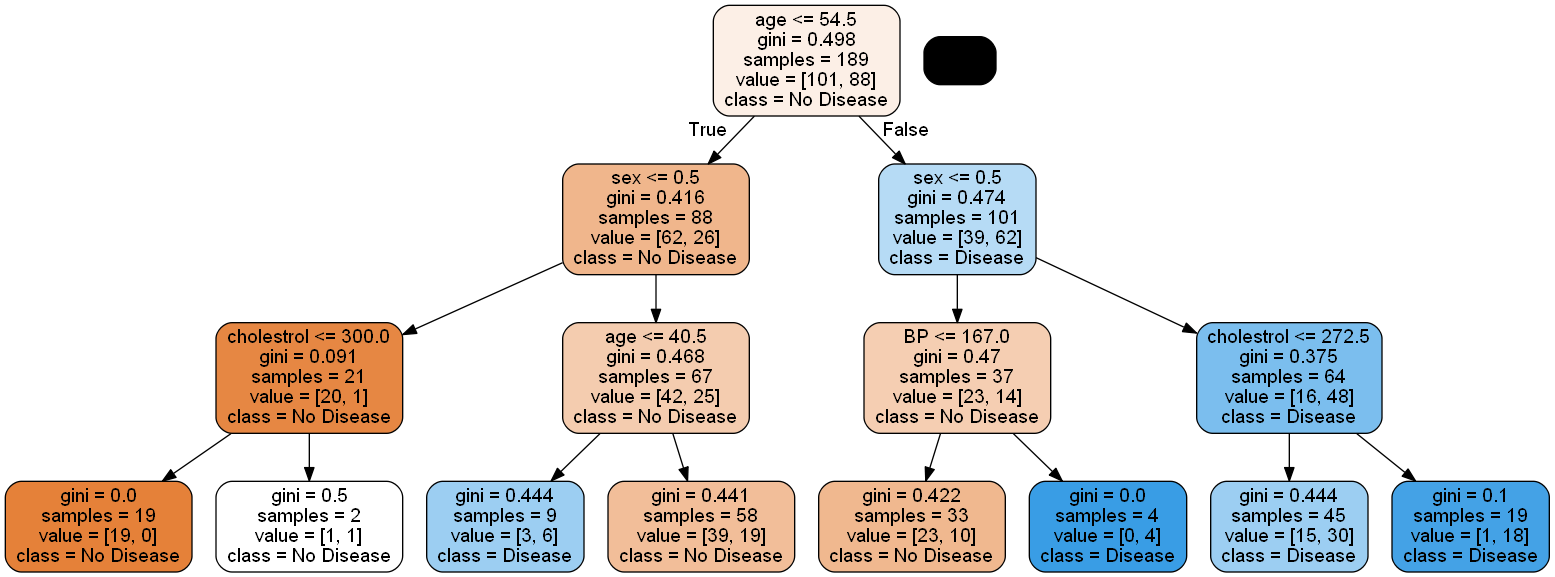

In [21]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dtc, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Plot Tree method

[Text(1674.0, 1426.95, 'age <= 54.5\ngini = 0.498\nsamples = 189\nvalue = [101, 88]\nclass = No Disease'),
 Text(837.0, 1019.25, 'sex <= 0.5\ngini = 0.416\nsamples = 88\nvalue = [62, 26]\nclass = No Disease'),
 Text(418.5, 611.55, 'cholestrol <= 300.0\ngini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = No Disease'),
 Text(209.25, 203.8499999999999, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = No Disease'),
 Text(627.75, 203.8499999999999, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No Disease'),
 Text(1255.5, 611.55, 'age <= 40.5\ngini = 0.468\nsamples = 67\nvalue = [42, 25]\nclass = No Disease'),
 Text(1046.25, 203.8499999999999, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]\nclass = Disease'),
 Text(1464.75, 203.8499999999999, 'gini = 0.441\nsamples = 58\nvalue = [39, 19]\nclass = No Disease'),
 Text(2511.0, 1019.25, 'sex <= 0.5\ngini = 0.474\nsamples = 101\nvalue = [39, 62]\nclass = Disease'),
 Text(2092.5, 611.55, 'BP <= 167.0\ngini = 0.47\nsamples = 37\nvalue = [23, 14

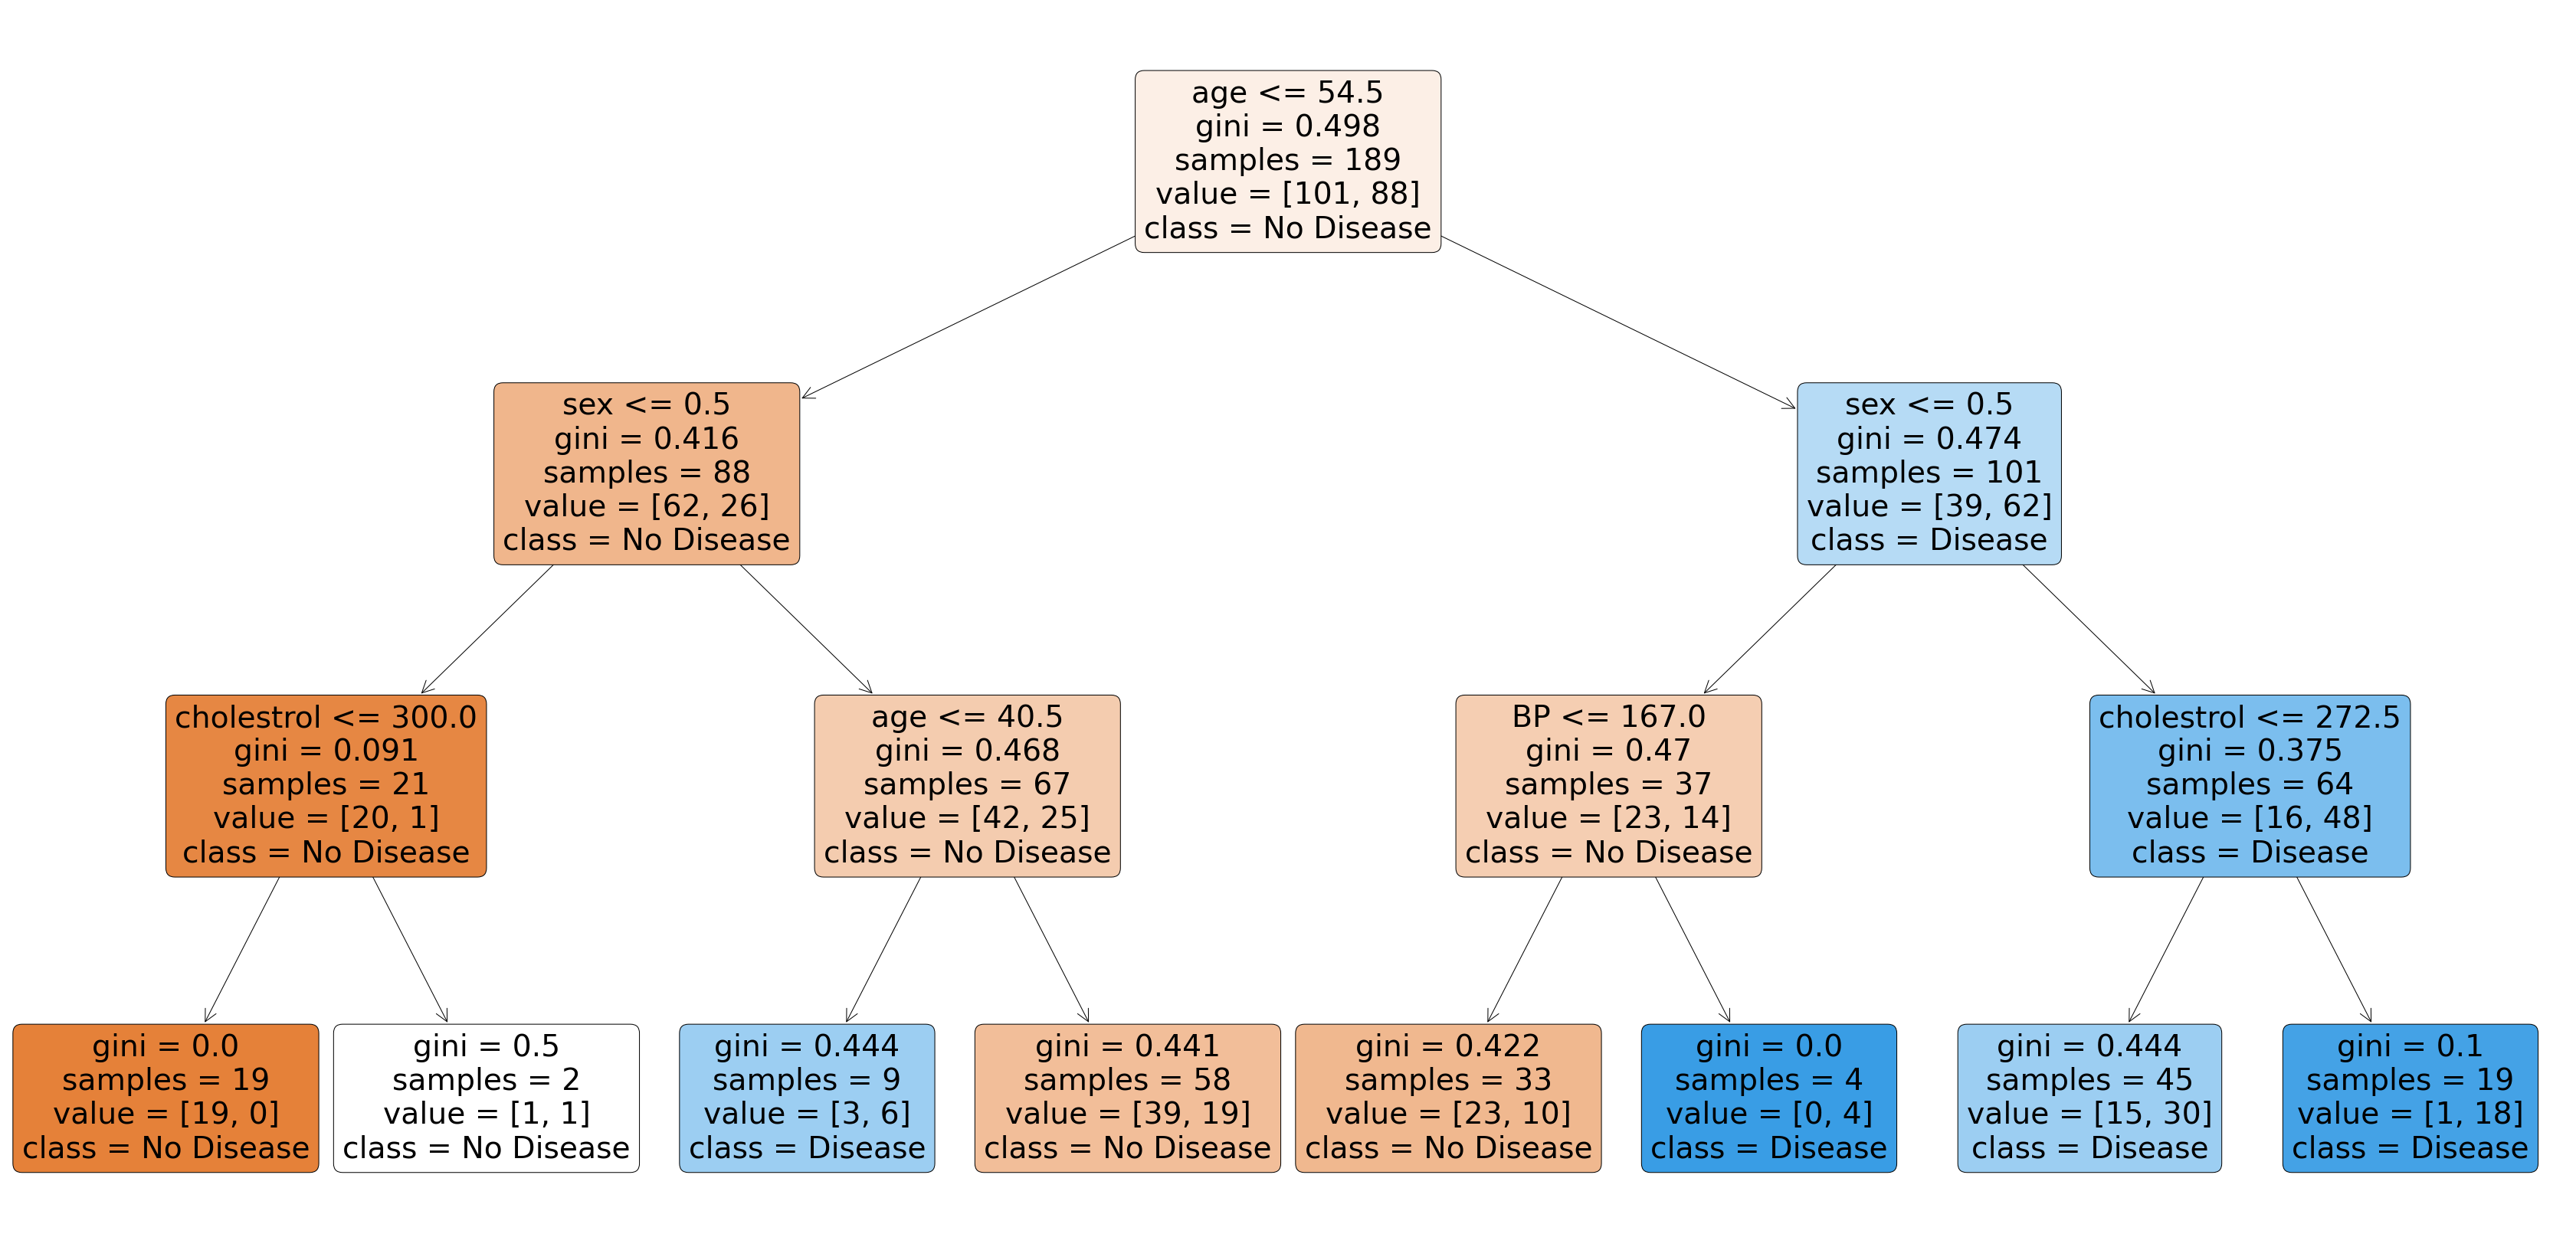

In [22]:
plt.figure(figsize=(60,30))
plot_tree(dtc, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"],fontsize= None)

# Evaluating the Model performance on Test set

In [23]:
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [25]:
# Prediction Train set
print(accuracy_score(y_train,y_train_pred))
confusion_matrix(y_train,y_train_pred)


0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [26]:
# prediction on test Set
print(accuracy_score(y_test,y_test_pred))
confusion_matrix(y_test,y_test_pred)


0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)

# Defining Some helper function for decision tree for their repititive use
#### Create model performnce and create graph

In [27]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()  

    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    return graph

In [28]:
def evaluate_model(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    print('Train set Performance') 
    print(accuracy_score(y_train,y_train_pred))
    print(confusion_matrix(y_train,y_train_pred))
    print('_'*50)
    print('Test set Performance') 
    print(accuracy_score(y_test,y_test_pred))
    print(confusion_matrix(y_test,y_test_pred))

In [29]:
evaluate_model(dtc)

Train set Performance
0.7407407407407407
[[82 19]
 [30 58]]
__________________________________________________
Test set Performance
0.6049382716049383
[[35 14]
 [18 14]]


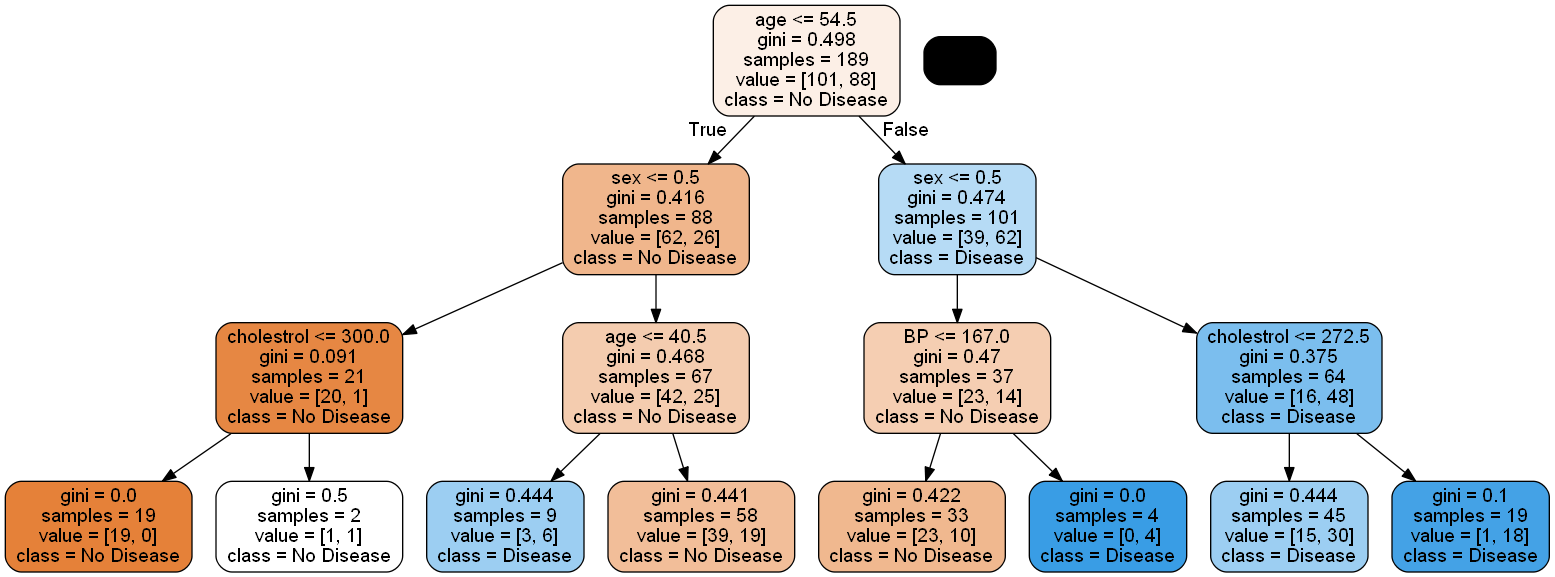

In [30]:
gph = get_dt_graph(dtc)
Image(gph.create_png())

### Decision tree without any hypermeters

In [31]:
# Instantiate
dt_defult = DecisionTreeClassifier(random_state=42)
#fit
dt_defult.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

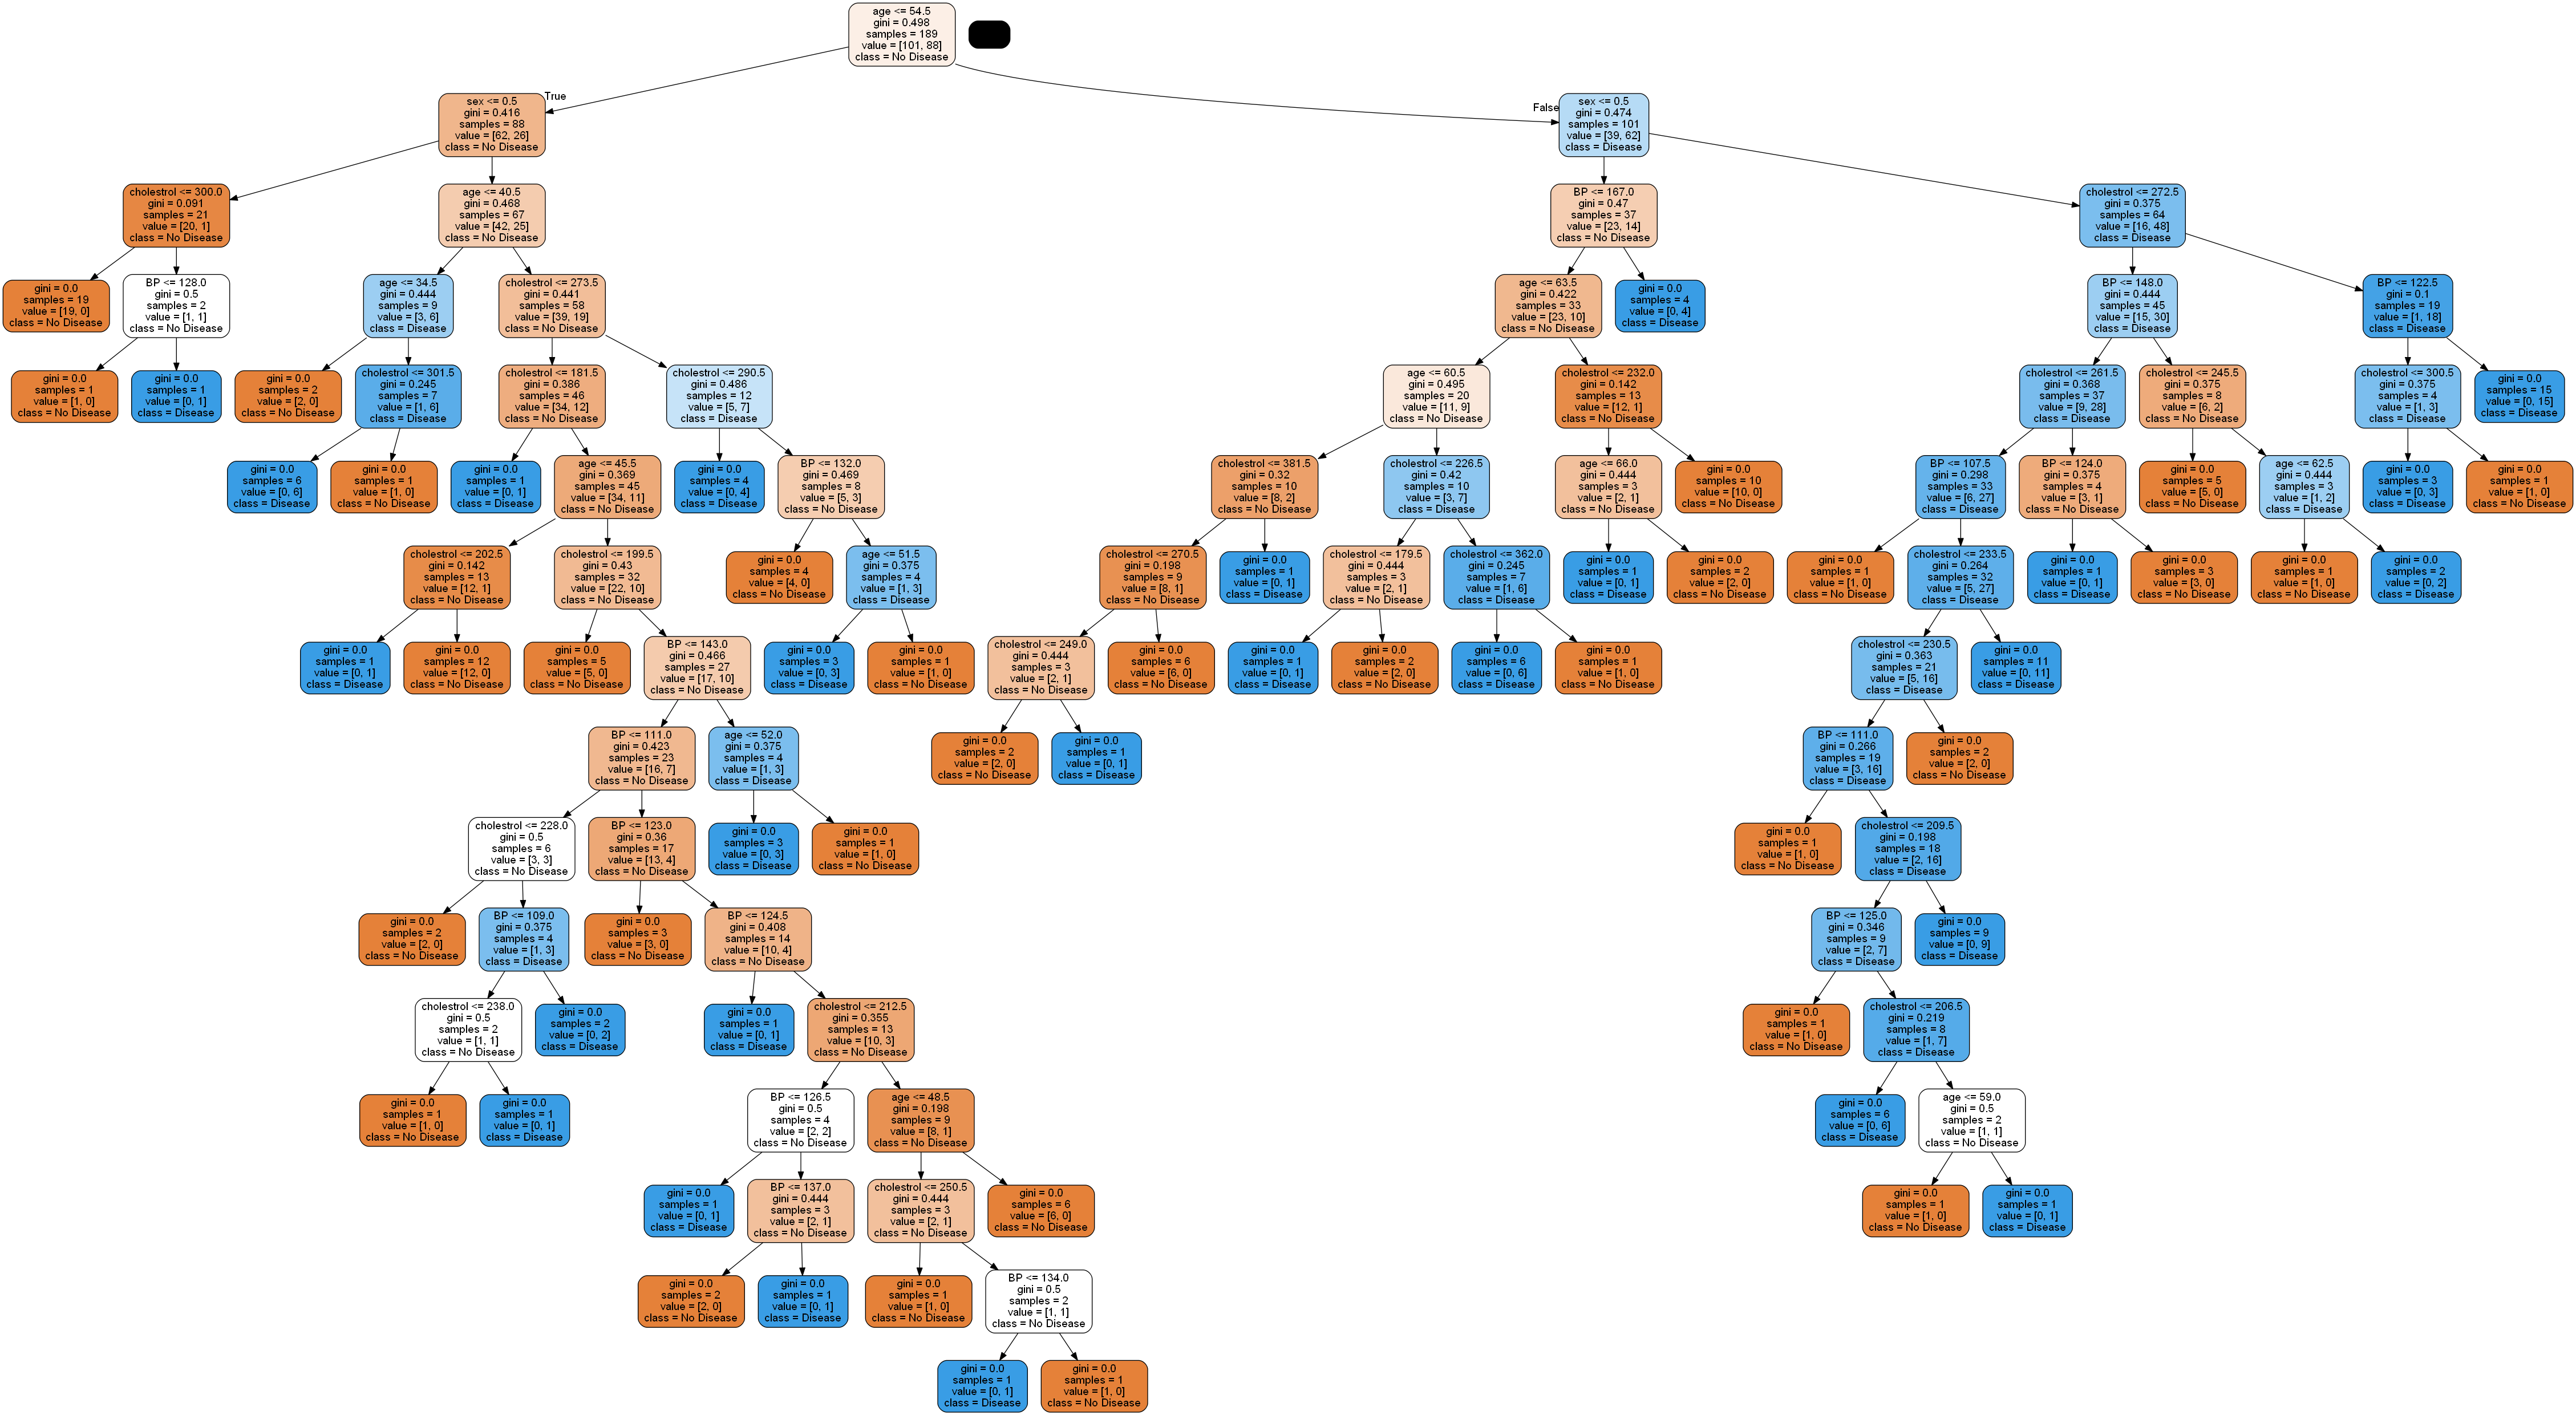

In [32]:
gph = get_dt_graph(dt_defult)
Image(gph.create_png())

In [34]:
evaluate_model(dt_defult)

Train set Performance
1.0
[[101   0]
 [  0  88]]
__________________________________________________
Test set Performance
0.6296296296296297
[[31 18]
 [12 20]]


### Controling the depth of the tree 


In [39]:
# Instantiate
dt_defult_d = DecisionTreeClassifier(max_depth=3,random_state=42)
#fit
dt_defult_d.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

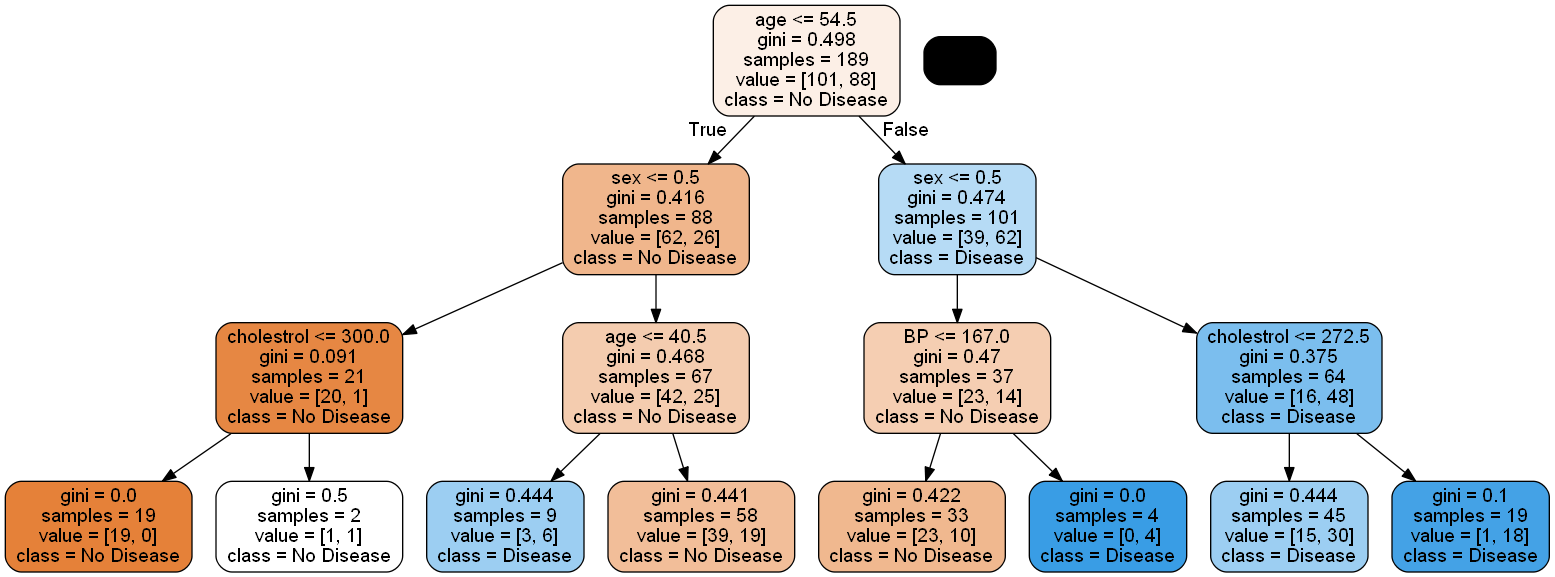

In [40]:
gph = get_dt_graph(dt_defult_d)
Image(gph.create_png())

In [41]:
evaluate_model(dt_defult_d)

Train set Performance
0.7407407407407407
[[82 19]
 [30 58]]
__________________________________________________
Test set Performance
0.6049382716049383
[[35 14]
 [18 14]]


## Specify the minimum sample before split

In [43]:
# Instantiate
dt_min_sample = DecisionTreeClassifier(min_samples_split=20,random_state=42)
#fit
dt_min_sample.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

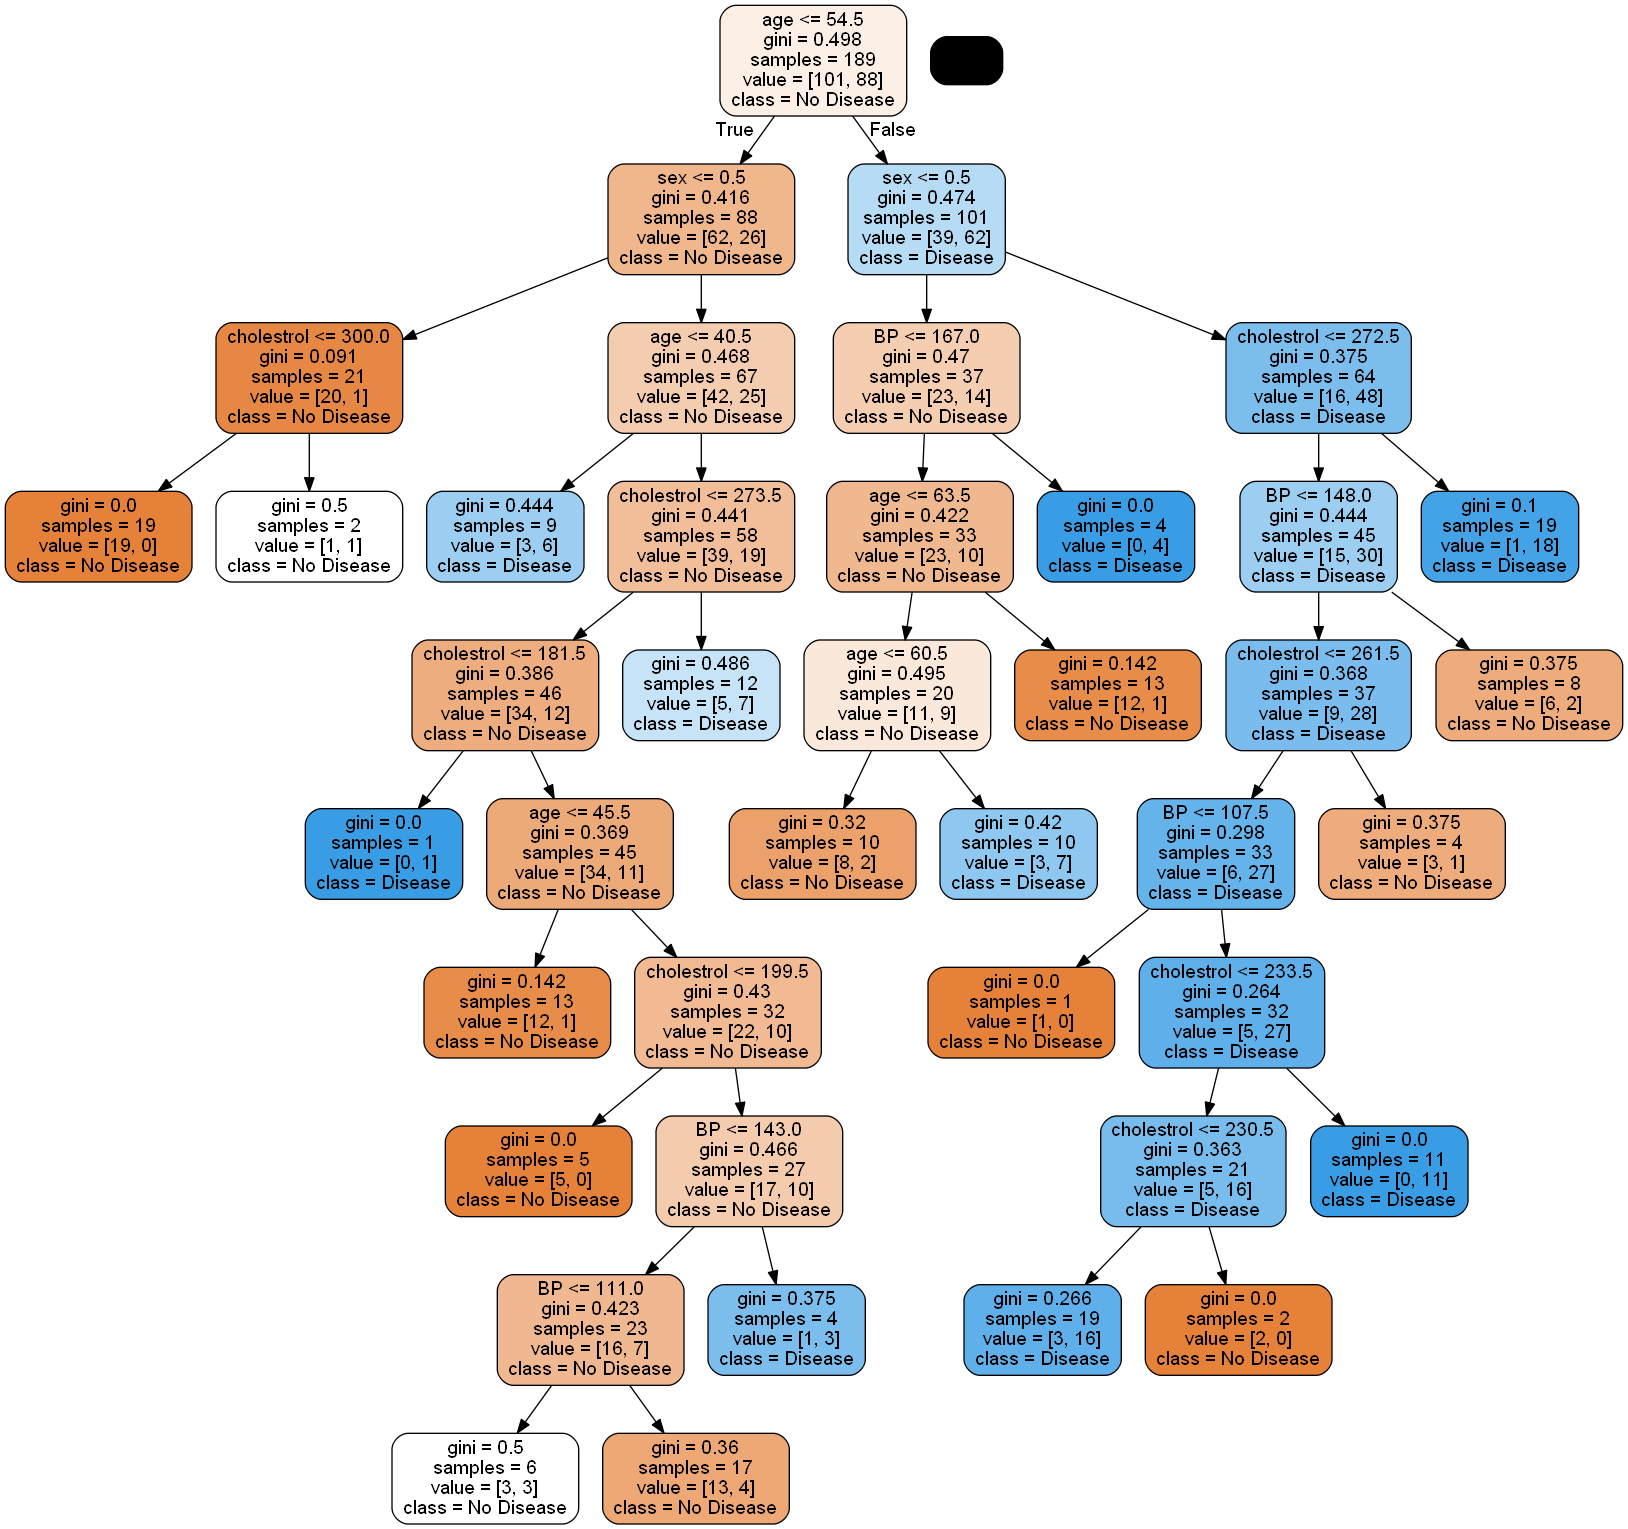

In [45]:
gph = get_dt_graph(dt_min_sample)
Image(gph.create_png())

In [46]:
evaluate_model(dt_min_sample)

Train set Performance
0.8359788359788359
[[85 16]
 [15 73]]
__________________________________________________
Test set Performance
0.6419753086419753
[[32 17]
 [12 20]]


## Specifying the minimum sample in leaf node

In [48]:
# Instantiate
dt_min_sample_leaf = DecisionTreeClassifier(min_samples_leaf=20,random_state=42)
#fit
dt_min_sample_leaf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

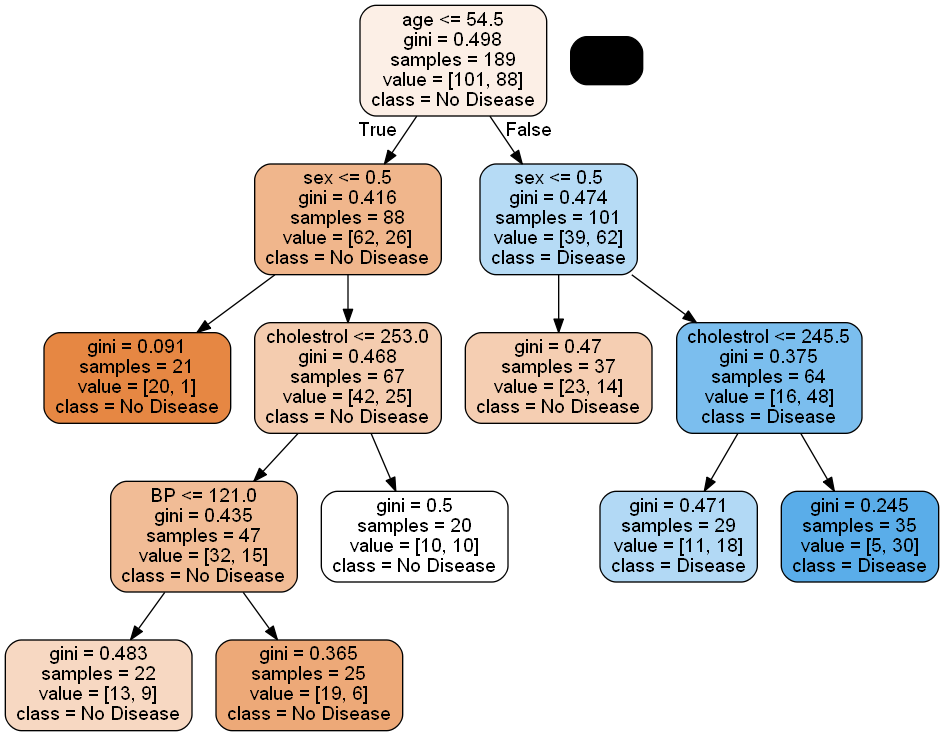

In [49]:
gph = get_dt_graph(dt_min_sample_leaf)
Image(gph.create_png())

In [50]:
evaluate_model(dt_min_sample_leaf)

Train set Performance
0.7037037037037037
[[85 16]
 [40 48]]
__________________________________________________
Test set Performance
0.6419753086419753
[[38 11]
 [18 14]]


## USing Entropy instead of Ginni

In [51]:
# Instantiate
dt_min_sample_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20,random_state=42,criterion='entropy')
#fit
dt_min_sample_leaf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

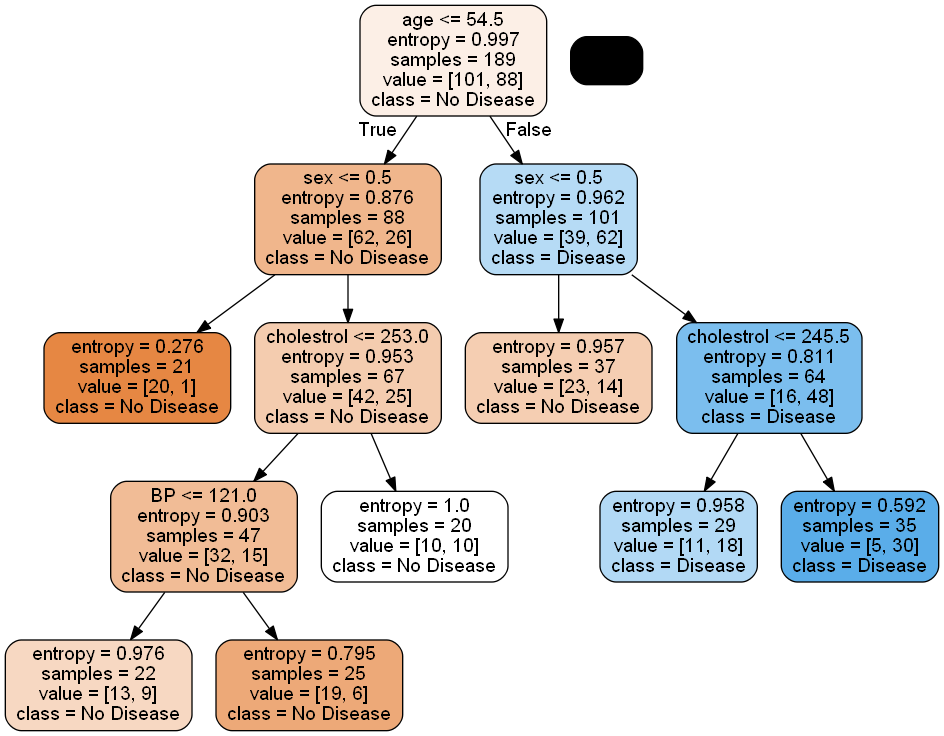

In [52]:
gph = get_dt_graph(dt_min_sample_leaf_entropy)
Image(gph.create_png())

In [55]:
evaluate_model(dt_min_sample_leaf_entropy)

Train set Performance
0.7037037037037037
[[85 16]
 [40 48]]
__________________________________________________
Test set Performance
0.6419753086419753
[[38 11]
 [18 14]]


### Hyperparameter Tuning Using gridsearchcv()

In [60]:
# Instantiate
DT = DecisionTreeClassifier(random_state=42)

In [59]:
from sklearn.model_selection import GridSearchCV

In [62]:
params = {'max_depth':[2,3,5,10,20],'min_samples_leaf':[5,10,20,50,100],'criterion':['ginni','entropy']}

In [63]:
grid_search=GridSearchCV(estimator = DT,cv=4,param_grid =params,n_jobs =-1,verbose=1,scoring='accuracy')

In [68]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 602 ms


C:\RavinderSingh\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.61923759 0.61923759 0.61402926 0.65602837 0.53435284
 0.66699911 0.6456117  0.64007092 0.65602837 0.53435284 0.63486259
 0.62477837 0.64007092 0.65602837 0.53435284 0.62455674 0.62477837
 0.64007092 0.65602837 0.53435284 0.62455674 0.62477837 0.64007092
 0.65602837 0.53435284]
  warnings.warn(


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [69]:
grid_search.cv_results_

{'mean_fit_time': array([0.00475025, 0.00450045, 0.00425106, 0.00475001, 0.00499952,
        0.00574982, 0.00475138, 0.00750011, 0.00775075, 0.00724894,
        0.00900209, 0.00500125, 0.00450039, 0.02150214, 0.02900249,
        0.0115028 , 0.00575018, 0.02125186, 0.0049997 , 0.00900018,
        0.01875275, 0.00498259, 0.00524926, 0.00500053, 0.00625092,
        0.00550127, 0.00448269, 0.01112026, 0.00423282, 0.00526112,
        0.00549996, 0.0055719 , 0.00429398, 0.00303209, 0.00425023,
        0.00445807, 0.00375015, 0.00379008, 0.00732183, 0.0035556 ,
        0.00504118, 0.00989288, 0.00681281, 0.00431418, 0.00504202,
        0.00785911, 0.00101894, 0.00605166, 0.00808984, 0.00499517]),
 'std_fit_time': array([4.31536113e-04, 4.99785778e-04, 4.32465520e-04, 4.32224412e-04,
        7.07899702e-04, 3.03155844e-03, 4.32605810e-04, 6.06273648e-03,
        6.49478864e-03, 4.49255559e-03, 5.33771692e-03, 6.16555240e-07,
        4.98175692e-04, 1.05000906e-02, 3.81859814e-02, 8.29184169e-0

In [66]:
cv_df= pd.DataFrame(grid_search.cv_results_)

In [67]:
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015633,0.000003,0.0,0.0,ginni,2,5,"{'criterion': 'ginni', 'max_depth': 2, 'min_sa...",NaN,NaN,NaN,NaN,NaN,NaN,26
1,0.008250,0.006221,0.0,0.0,ginni,2,10,"{'criterion': 'ginni', 'max_depth': 2, 'min_sa...",NaN,NaN,NaN,NaN,NaN,NaN,28
2,0.007252,0.003114,0.0,0.0,ginni,2,20,"{'criterion': 'ginni', 'max_depth': 2, 'min_sa...",NaN,NaN,NaN,NaN,NaN,NaN,29
3,0.004499,0.000500,0.0,0.0,ginni,2,50,"{'criterion': 'ginni', 'max_depth': 2, 'min_sa...",NaN,NaN,NaN,NaN,NaN,NaN,30
4,0.004500,0.000500,0.0,0.0,ginni,2,100,"{'criterion': 'ginni', 'max_depth': 2, 'min_sa...",NaN,NaN,NaN,NaN,NaN,NaN,31


In [70]:
cv_df.shape

(50, 15)

In [71]:
cv_df.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.069454,0.095013,0.005026,0.003177,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
28,0.064815,0.102404,0.002510,0.000491,entropy,2,50,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,2
33,0.010002,0.005960,0.022001,0.031759,entropy,3,50,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,2
38,0.010501,0.006802,0.004000,0.001223,entropy,5,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,2
43,0.018001,0.007282,0.004501,0.001658,entropy,10,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,2


In [74]:
grid_search.best_score_

0.6669991134751774

In [73]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [75]:
DT_best = grid_search.best_estimator_

In [76]:
evaluate_model(DT_best)

Train set Performance
0.7195767195767195
[[82 19]
 [34 54]]
__________________________________________________
Test set Performance
0.6172839506172839
[[36 13]
 [18 14]]


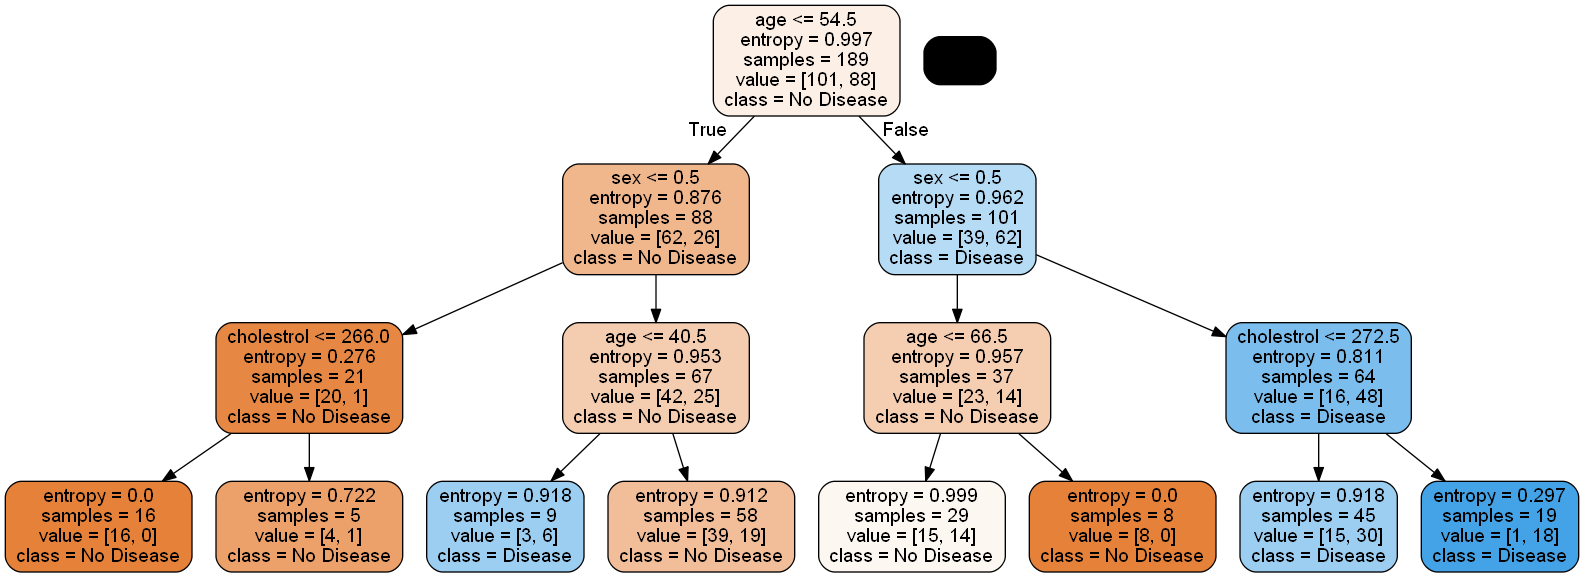

In [77]:
gph = get_dt_graph(DT_best)
Image(gph.create_png())